# Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_csv('churn_prediction_cleaned.csv')
data.head()

,customer_id,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_female,gender_male
0,1,3135.0,66,0.0,0,187.000000,2,755.000000,69.997814,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1
1,2,310.0,35,0.0,0,796.109576,2,925.975019,60.000000,5390.37,...,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1
2,4,2356.0,31,0.0,1,146.000000,2,41.000000,69.997814,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1
3,5,478.0,90,0.0,0,1020.000000,2,582.000000,147.000000,2291.91,...,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,1
4,6,2531.0,42,2.0,0,1494.000000,3,388.000000,58.000000,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1


In [3]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
gender_female                     0
gender_male                       0
dtype: int64

In [4]:
data.columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'occupation', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'gender_female', 'gender_male'],
      dtype='object')

### Segregate Variables:Independent And dependent Variables

In [5]:
x=data.drop('churn',axis=1)
y=data['churn']

### Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_x=ss.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)

In [7]:
x.head()

,customer_id,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_female,gender_male
0,-1.731304,0.745347,0.999147,-0.330877,-0.659607,-1.427499,-0.341489,-0.034918,0.661919,-0.139017,...,-0.144709,-0.127317,-0.044545,-0.109858,-0.070378,-0.137427,-0.142564,-0.142265,-0.813874,0.813874
1,-1.731190,-1.404354,-0.741756,-0.330877,-0.659607,0.000000,-0.341489,0.208053,0.385946,-0.046720,...,0.007249,0.118793,-0.044540,-0.109846,0.035155,-0.133297,-0.022705,0.030459,-0.813874,0.813874
2,-1.730961,0.152562,-0.966389,-0.330877,0.438268,-1.523586,-0.341489,-1.049574,0.661919,-0.081398,...,-0.061991,-0.096652,-0.044539,-0.109844,0.045936,-0.126767,-0.058165,-0.057152,-0.813874,0.813874
3,-1.730847,-1.276513,2.346943,-0.330877,-0.659607,0.524706,-0.341489,-0.280766,2.787438,-0.119457,...,-0.129711,-0.137244,-0.044541,-0.109849,-0.070372,-0.049234,-0.122742,-0.137290,-0.813874,0.813874
4,-1.730733,0.285729,-0.348649,1.756001,-0.659607,1.635565,1.172672,-0.556457,0.330739,-0.151482,...,-0.140285,-0.117848,-0.044543,-0.085794,-0.059058,-0.074142,-0.149738,-0.137116,-0.813874,0.813874


### Train Test  valid Split


In [8]:
from sklearn.model_selection import train_test_split as tts

In [9]:
train1_x,test_x,train1_y,test_y=tts(x,y,test_size=0.2,random_state=50,stratify=y)

In [10]:
train_x,valid_x,train_y,valid_y=tts(train1_x,train1_y,test_size=0.2,random_state=50,stratify=train1_y)

### Importing Decision Tree model for classification problem


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
DT=DecisionTreeClassifier(random_state=15)
DT.fit(train1_x,train1_y)

DecisionTreeClassifier(random_state=15)

In [13]:
DT.score(test_x,test_y),DT.score(valid_x,valid_y)

(0.7884446010216664, 1.0)

### Making prediction using predict_proba

In [14]:
test_predict=DT.predict_proba(test_x)

In [15]:
test_preds=test_predict[:,1]

In [16]:
new_test=[]
for i in range(len(test_preds)):
    if test_preds[i]<=0.7:
        new_test.append(0)
    else:
        new_test.append(1)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
score=accuracy_score(test_y,new_test)
score

0.7884446010216664

### calculating optimal value of max_depth

In [19]:
test_score=[]
valid_score=[]
for depth in range(1,10):
    dt=DecisionTreeClassifier(max_depth=depth,random_state=15)
    dt.fit(train1_x,train1_y)
    temp1=dt.score(test_x,test_y)
    temp2=dt.score(valid_x,valid_y)
    test_score.append(temp1)
    valid_score.append(temp2)

In [20]:
df=pd.DataFrame({'depth':range(1,10),'test_scr':test_score,'valid_scr':valid_score})
df

,depth,test_scr,valid_scr
0,1,0.845693,0.849593
1,2,0.845693,0.849593
2,3,0.847807,0.851575
3,4,0.856262,0.857741
4,5,0.854853,0.866769
5,6,0.856086,0.872935
6,7,0.858024,0.879322
7,8,0.854324,0.887910
8,9,0.845869,0.898260


No handles with labels found to put in legend.


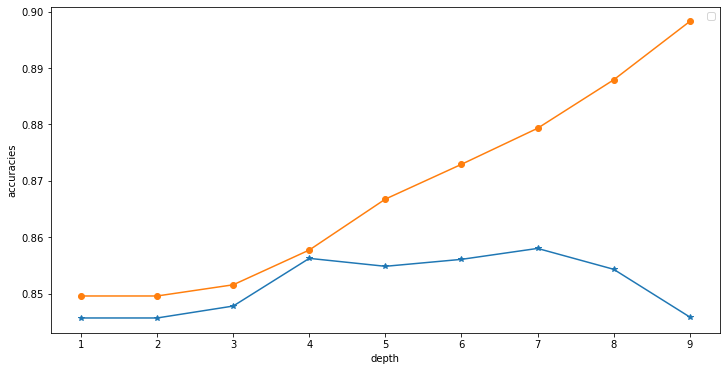

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['depth'],df['test_scr'],marker='*')
plt.plot(df['depth'],df['valid_scr'],marker='o')
plt.xlabel('depth')
plt.ylabel('accuracies')
plt.legend()

In [22]:
dt=DecisionTreeClassifier(max_depth=7,random_state=15)
dt.fit(train1_x,train1_y)
train1_score=dt.score(train1_x,train1_y)
train_score=dt.score(train_x,train_y)
test_score=dt.score(test_x,test_y)
valid_score=dt.score(valid_x,valid_y )

In [23]:
train1_score,train_score,test_score,valid_score

(0.8745210306099978,
 0.8733208544373486,
 0.8580236040162057,
 0.8793217353005945)

# Report

In [24]:
from sklearn.metrics import classification_report as rep

In [25]:
test_report=rep(test_y,DT.predict(test_x))
valid_report=rep(valid_y,DT.predict(valid_x))

In [27]:
print(test_report)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4625
           1       0.43      0.45      0.44      1052

    accuracy                           0.79      5677
   macro avg       0.65      0.66      0.66      5677
weighted avg       0.79      0.79      0.79      5677



In [28]:
print(valid_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3699
           1       1.00      1.00      1.00       842

    accuracy                           1.00      4541
   macro avg       1.00      1.00      1.00      4541
weighted avg       1.00      1.00      1.00      4541

